In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
events = pd.read_csv('vehicle_events.csv')
events.head()

,Timestamp,Vehicle_ID,Stop_Intersection,Stop_Passengers,Requested_Stop_Intersection
0,1380949200,83,2767,0,2764
1,1380949200,89,3070,0,1818
2,1380949200,112,97,0,972
3,1380949200,121,215,0,396
4,1380949200,141,1314,0,1237


In [3]:
len(events)

543572

In [4]:
paths = pd.read_csv('vehicle_paths.csv')
paths.head()

,Timestamp,Vehicle_ID,Latitude,Longitude,Num_Passengers
0,1380949200,83,40.73062,-73.99065,0
1,1380949200,89,40.71429,-74.01153,0
2,1380949200,112,40.77178,-73.97919,0
3,1380949200,121,40.73974,-74.00249,0
4,1380949200,141,40.77114,-73.96392,0


In [5]:
paths['Num_Passengers'].mean()

3.2953797545689674

In [6]:
requests = pd.read_csv('requests.csv')
requests.head()

,Timestamp,Requested_Pickup,Requested_Dropoff,Actual_Pickup,Actual_Dropoff
0,1380949200,1149,725,218,3601
1,1380949200,1225,1714,2003,3601
2,1380949200,1237,3143,1314,2218
3,1380949200,1323,3566,1330,2573
4,1380949200,1328,2466,1323,2473


### Task 1

In [7]:
requests['DateTime'] = pd.to_datetime(requests['Timestamp'], unit='s')
requests['hour'] = requests['DateTime'].dt.hour
requests['date'] = requests['DateTime'].dt.date
requests.head()

,Timestamp,Requested_Pickup,Requested_Dropoff,Actual_Pickup,Actual_Dropoff,DateTime,hour,date
0,1380949200,1149,725,218,3601,2013-10-05 05:00:00,5,2013-10-05
1,1380949200,1225,1714,2003,3601,2013-10-05 05:00:00,5,2013-10-05
2,1380949200,1237,3143,1314,2218,2013-10-05 05:00:00,5,2013-10-05
3,1380949200,1323,3566,1330,2573,2013-10-05 05:00:00,5,2013-10-05
4,1380949200,1328,2466,1323,2473,2013-10-05 05:00:00,5,2013-10-05


In [8]:
servingRate = pd.DataFrame()
servingRate['total'] = requests.groupby('hour').count()['DateTime']
servingRate['notServed'] = requests[(requests['Actual_Pickup']==-1)].groupby('hour').count()['DateTime']
servingRate.head()

,total,notServed
hour,,
0,26576,18226
1,24209,16350
2,22763,15402
3,22186,15083
4,19313,12565


In [9]:
servingRate['DateTime'] = requests.groupby('hour').first()['DateTime']

In [10]:
servingRate['rate'] = (servingRate['total']-servingRate['notServed'])*100.00/servingRate['total']
servingRate.head()

,total,notServed,DateTime,rate
hour,,,,
0,26576,18226,2013-10-06 00:00:00,31.419326
1,24209,16350,2013-10-06 01:00:00,32.463134
2,22763,15402,2013-10-06 02:00:00,32.337565
3,22186,15083,2013-10-06 03:00:00,32.015686
4,19313,12565,2013-10-06 04:00:00,34.940196


In [11]:
servingRate = servingRate.reindex(range(5,24,1)+range(0,5,1))
servingRate.reset_index(inplace=True)
servingRate.head()

,hour,total,notServed,DateTime,rate
0,5,10052,2755,2013-10-05 05:00:00,72.592519
1,6,6070,606,2013-10-05 06:00:00,90.016474
2,7,3725,282,2013-10-05 07:00:00,92.429530
3,8,2567,257,2013-10-05 08:00:00,89.988313
4,9,1887,108,2013-10-05 09:00:00,94.276630


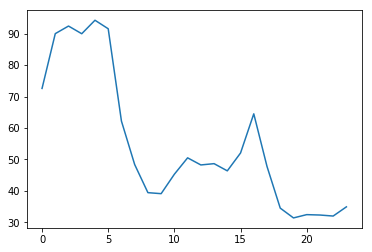

In [12]:
plt.plot(servingRate['rate'])

In [13]:
avg = (servingRate['total'].sum()-servingRate['notServed'].sum())*100.0/servingRate['total'].sum()
print('The average serving rate throughout the entire day from 5am on 5 October 2013 to 5am on 6 October 2013 is %.2f%%.' %avg)

The average serving rate throughout the entire day from 5am on 5 October 2013 to 5am on 6 October 2013 is 45.15%.


In [14]:
servingRate.to_csv('task1.csv', index=False)

### Task 2

In [15]:
requests.head()

,Timestamp,Requested_Pickup,Requested_Dropoff,Actual_Pickup,Actual_Dropoff,DateTime,hour,date
0,1380949200,1149,725,218,3601,2013-10-05 05:00:00,5,2013-10-05
1,1380949200,1225,1714,2003,3601,2013-10-05 05:00:00,5,2013-10-05
2,1380949200,1237,3143,1314,2218,2013-10-05 05:00:00,5,2013-10-05
3,1380949200,1323,3566,1330,2573,2013-10-05 05:00:00,5,2013-10-05
4,1380949200,1328,2466,1323,2473,2013-10-05 05:00:00,5,2013-10-05


In [16]:
tripsUnserved = requests[requests['Actual_Pickup']==-1].groupby(['Requested_Pickup', 'hour']).count()['date'].reset_index()
tripsUnserved.rename(columns={'Requested_Pickup': 'stop_id', 'date': 'counts'}, inplace=True)
tripsUnserved.head()

,stop_id,hour,counts
0,0,2,3
1,0,3,1
2,0,4,1
3,0,13,1
4,0,17,1


In [17]:
tripsUnserved.to_csv('task2.csv', index=False)

### Task 3

Convert differences in latitude and longitude into miles:
- 1 degree latitude is approximately 69 miles
- At 40° north or south the distance between a degree of longitude is 53 miles ([source](https://www.thoughtco.com/degree-of-latitude-and-longitude-distance-4070616))
- grid system, so assume distance traveled is distance in lat difference + distance in long difference

In [18]:
paths = pd.read_csv('vehicle_paths.csv')

In [19]:
paths.sort_values(['Vehicle_ID', 'Timestamp'], inplace=True)
paths['lat_diff'] = np.abs(paths.groupby('Vehicle_ID')['Latitude'].diff())
paths['lon_diff'] = np.abs(paths.groupby('Vehicle_ID')['Longitude'].diff())
paths['time_diff'] = paths.groupby('Vehicle_ID')['Timestamp'].diff()
paths.reset_index(inplace=True, drop=True)
paths.head()

,Timestamp,Vehicle_ID,Latitude,Longitude,Num_Passengers,lat_diff,lon_diff,time_diff
0,1380949199,0,40.76041,-73.98748,0,NaN,NaN,NaN
1,1380949199,0,40.76041,-73.98748,0,0.00000,0.00000,0.0
2,1380949395,0,40.76104,-73.98702,1,0.00063,0.00046,196.0
3,1380949405,0,40.76167,-73.98657,1,0.00063,0.00045,10.0
4,1380949414,0,40.76229,-73.98610,1,0.00062,0.00047,9.0


In [20]:
paths['distance'] = paths['lat_diff']*69 + paths['lon_diff']*53
paths['speed'] = paths['distance']*3600/paths['time_diff']
paths.replace([np.inf, -np.inf], np.nan, inplace=True)
paths.fillna(value=0, inplace=True)
paths.head()

,Timestamp,Vehicle_ID,Latitude,Longitude,Num_Passengers,lat_diff,lon_diff,time_diff,distance,speed
0,1380949199,0,40.76041,-73.98748,0,0.00000,0.00000,0.0,0.00000,0.000000
1,1380949199,0,40.76041,-73.98748,0,0.00000,0.00000,0.0,0.00000,0.000000
2,1380949395,0,40.76104,-73.98702,1,0.00063,0.00046,196.0,0.06785,1.246224
3,1380949405,0,40.76167,-73.98657,1,0.00063,0.00045,10.0,0.06732,24.235200
4,1380949414,0,40.76229,-73.98610,1,0.00062,0.00047,9.0,0.06769,27.076000


In [21]:
paths['speed'] = paths['speed'].astype('int64')
paths['datetime'] = pd.to_datetime(paths['Timestamp'], unit='s')
paths.head()

,Timestamp,Vehicle_ID,Latitude,Longitude,Num_Passengers,lat_diff,lon_diff,time_diff,distance,speed,datetime
0,1380949199,0,40.76041,-73.98748,0,0.00000,0.00000,0.0,0.00000,0,2013-10-05 04:59:59
1,1380949199,0,40.76041,-73.98748,0,0.00000,0.00000,0.0,0.00000,0,2013-10-05 04:59:59
2,1380949395,0,40.76104,-73.98702,1,0.00063,0.00046,196.0,0.06785,1,2013-10-05 05:03:15
3,1380949405,0,40.76167,-73.98657,1,0.00063,0.00045,10.0,0.06732,24,2013-10-05 05:03:25
4,1380949414,0,40.76229,-73.98610,1,0.00062,0.00047,9.0,0.06769,27,2013-10-05 05:03:34


In [22]:
paths.to_csv('task3.csv', index=False)

### Task 4
- use pnas datasets

In [23]:
events_pnas = pd.read_csv('vehicle_events_pnas.csv')
events_pnas.head()

,Timestamp,Vehicle_ID,Stop_Intersection,Stop_Passengers,Requested_Stop_Intersection
0,1380949230,137,1116,1,NaN
1,1380949230,321,707,1,NaN
2,1380949230,428,2818,1,NaN
3,1380949240,148,3132,1,NaN
4,1380949240,343,1738,1,NaN


In [24]:
paths_pnas = pd.read_csv('vehicle_paths_pnas.csv')
paths_pnas.head()

,Timestamp,Vehicle_ID,Latitude,Longitude,Num_Passengers
0,1380949230,137,40.73467,-73.99459,0
1,1380949230,321,40.78573,-73.97644,0
2,1380949230,428,40.78154,-73.96041,0
3,1380949231,148,40.73478,-73.99871,0
4,1380949231,148,40.73478,-73.99871,0


In [25]:
paths_pnas['hour'] = pd.to_datetime(paths_pnas['Timestamp'], unit='s').dt.hour
paths_pnas.head()

,Timestamp,Vehicle_ID,Latitude,Longitude,Num_Passengers,hour
0,1380949230,137,40.73467,-73.99459,0,5
1,1380949230,321,40.78573,-73.97644,0,5
2,1380949230,428,40.78154,-73.96041,0,5
3,1380949231,148,40.73478,-73.99871,0,5
4,1380949231,148,40.73478,-73.99871,0,5


In [26]:
passengers = paths_pnas.groupby(['Vehicle_ID', 'hour'])['Num_Passengers'].max().reset_index()
passengers.head()

,Vehicle_ID,hour,Num_Passengers
0,0,0,65
1,0,1,67
2,0,2,68
3,0,3,70
4,0,4,72


In [27]:
passengers['Latitude'] = paths_pnas.groupby(['Vehicle_ID', 'hour'])['Latitude'].first().reset_index()['Latitude']
passengers['Longitude'] = paths_pnas.groupby(['Vehicle_ID', 'hour'])['Longitude'].first().reset_index()['Longitude']
passengers.head()

,Vehicle_ID,hour,Num_Passengers,Latitude,Longitude
0,0,0,65,40.74167,-74.00112
1,0,1,67,40.74044,-73.99459
2,0,2,68,40.77373,-73.96203
3,0,3,70,40.78531,-73.96935
4,0,4,72,40.77140,-73.95647


In [28]:
task4_noerr = passengers[(passengers['Num_Passengers'] == 5) | (passengers['Num_Passengers'] == 6)]
task4_noerr.to_csv('task4_noerr.csv', index=False)

In [29]:
task4_noerr['hour'].unique()

array([ 5,  6,  7,  9, 11,  8, 10, 12])

In [30]:
task4_err = passengers[passengers['Num_Passengers'] > 6]
task4_err.to_csv('task4_err.csv', index=False)

In [31]:
len(task4_err)

10311

### Task 5

In [32]:
passDist = paths.groupby(['Vehicle_ID', 'Num_Passengers']).count()['Timestamp'].reset_index()
passDist.head()

,Vehicle_ID,Num_Passengers,Timestamp
0,0,0,504
1,0,1,378
2,0,2,359
3,0,3,1087
4,0,4,3983


In [33]:
total_vid = passDist.groupby('Vehicle_ID')['Timestamp'].sum()
total_vid.head()

Vehicle_ID
0    6311
1    6765
2    6888
3    7035
4    2827
Name: Timestamp, dtype: int64

In [34]:
task5 = pd.merge(passDist, total_vid, left_on='Vehicle_ID', right_index=True)
task5.rename(columns={'Timestamp_x': 'catCounts', 
                    'Timestamp_y': 'totalPerVID'},
            inplace=True)
task5.head()

,Vehicle_ID,Num_Passengers,catCounts,totalPerVID
0,0,0,504,6311
1,0,1,378,6311
2,0,2,359,6311
3,0,3,1087,6311
4,0,4,3983,6311


In [35]:
task5['pct'] = task5['catCounts']*100.0/task5['totalPerVID']
task5.head()

,Vehicle_ID,Num_Passengers,catCounts,totalPerVID,pct
0,0,0,504,6311,7.986056
1,0,1,378,6311,5.989542
2,0,2,359,6311,5.688480
3,0,3,1087,6311,17.223895
4,0,4,3983,6311,63.112027


In [36]:
task5.to_csv('task5.csv', index=False)

- we take out vehicle ids that spend 90% of their time with 3 or more passengers

In [37]:
task5_top = task5[(task5['Num_Passengers'] == 3) | (task5['Num_Passengers'] == 4)] \
            .groupby('Vehicle_ID') \
            .sum()['pct'] \
            .reset_index()
task5_top.head()

,Vehicle_ID,pct
0,0,80.335921
1,1,81.980783
2,2,82.694541
3,3,83.909026
4,4,85.886098


In [38]:
len(task5_top)

469

In [39]:
vid_task5 = task5_top[task5_top['pct'] >= 90]['Vehicle_ID'].unique()

In [40]:
len(vid_task5)

11

In [41]:
task5_vid = paths[paths['Vehicle_ID'].isin(vid_task5)][['datetime', 'Vehicle_ID', 'Latitude', 'Longitude', 'Num_Passengers']]
task5_vid.head()

,datetime,Vehicle_ID,Latitude,Longitude,Num_Passengers
388781,2013-10-05 15:23:50,75,40.81552,-73.96407,0
388782,2013-10-05 15:23:50,75,40.81552,-73.96407,0
388783,2013-10-05 15:28:47,75,40.79687,-73.97609,1
388784,2013-10-05 15:29:00,75,40.79603,-73.97674,1
388785,2013-10-05 15:30:07,75,40.79552,-73.97598,1


In [42]:
task5_vid.to_csv('task5_vid.csv', index=False)

### Task 7

In [43]:
events.sort_values(['Vehicle_ID', 'Timestamp'], inplace=True)
events['time_diff'] = events.groupby('Vehicle_ID')['Timestamp'].diff()
events.head()

,Timestamp,Vehicle_ID,Stop_Intersection,Stop_Passengers,Requested_Stop_Intersection,time_diff
29,1380949209,0,246,0,2147,NaN
456,1380949395,0,246,1,2147,186.0
646,1380949438,0,2451,0,1401,43.0
647,1380949438,0,2451,1,1401,0.0
648,1380949438,0,2451,0,2449,0.0


In [44]:
rebalancing = events[(events['Stop_Passengers'] == 0) & (events['time_diff'] > 0)]
rebalancing.head()

,Timestamp,Vehicle_ID,Stop_Intersection,Stop_Passengers,Requested_Stop_Intersection,time_diff
646,1380949438,0,2451,0,1401,43.0
1000,1380949499,0,3198,0,3195,61.0
2186,1380949692,0,3314,0,1556,20.0
3577,1380949916,0,2258,0,723,58.0
4185,1380950023,0,3028,0,3028,19.0


In [45]:
task7_rebalancing = rebalancing.groupby('Vehicle_ID').count()['Timestamp'].reset_index()
task7_rebalancing['total'] = events.groupby('Vehicle_ID')['Timestamp'].nunique()
task7_rebalancing.rename(columns={'Timestamp': 'rebCount'}, inplace=True)
task7_rebalancing['rebPct'] = task7_rebalancing['rebCount']*100.0/task7_rebalancing['total']
task7_rebalancing.head()

,Vehicle_ID,rebCount,total,rebPct
0,0,289,712.0,40.589888
1,1,329,783.0,42.017880
2,2,363,824.0,44.053398
3,3,343,838.0,40.930788
4,4,141,335.0,42.089552


In [46]:
rebalanceCount = task7_rebalancing['rebCount'].sum()
rebalancePct = rebalanceCount*100/task7_rebalancing['total'].sum()

print("The number of rebalancing trips is %d " %rebalanceCount+
      "and the percentage of trips that involve rebalancing is %.2f%%." %rebalancePct)

The number of rebalancing trips is 128087 and the percentage of trips that involve rebalancing is 44.84%.


In [47]:
rebalancing['hour'] = pd.to_datetime(rebalancing['Timestamp'], unit='s').dt.hour
rebalancing.head()

/nfshome/rms818/.conda/envs/myEnv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Timestamp,Vehicle_ID,Stop_Intersection,Stop_Passengers,Requested_Stop_Intersection,time_diff,hour
646,1380949438,0,2451,0,1401,43.0,5
1000,1380949499,0,3198,0,3195,61.0,5
2186,1380949692,0,3314,0,1556,20.0,5
3577,1380949916,0,2258,0,723,58.0,5
4185,1380950023,0,3028,0,3028,19.0,5


In [48]:
rebalancingdf = rebalancing.groupby('hour').count().reset_index()
rebalancingdf.rename(columns={'Timestamp': 'rebalanceCount'}, inplace=True)
rebalancingdf.head()

,hour,rebalanceCount,Vehicle_ID,Stop_Intersection,Stop_Passengers,Requested_Stop_Intersection,time_diff
0,0,5857,5857,5857,5857,5857,5857
1,1,5897,5897,5897,5897,5897,5897
2,2,5748,5748,5748,5748,5748,5748
3,3,5612,5612,5612,5612,5612,5612
4,4,5565,5565,5565,5565,5565,5565


In [49]:
paths = pd.read_csv('vehicle_paths.csv')

paths.sort_values(['Vehicle_ID', 'Timestamp'], inplace=True)
paths['lat_diff'] = np.abs(paths.groupby('Vehicle_ID')['Latitude'].diff())
paths['lon_diff'] = np.abs(paths.groupby('Vehicle_ID')['Longitude'].diff())
paths['time_diff'] = paths.groupby('Vehicle_ID')['Timestamp'].diff()
paths.reset_index(inplace=True, drop=True)
paths['distance'] = paths['lat_diff']*69 + paths['lon_diff']*53
paths['speed'] = paths['distance']*3600/paths['time_diff']
paths.replace([np.inf, -np.inf], np.nan, inplace=True)
paths.fillna(value=0, inplace=True)
paths.head()

,Timestamp,Vehicle_ID,Latitude,Longitude,Num_Passengers,lat_diff,lon_diff,time_diff,distance,speed
0,1380949199,0,40.76041,-73.98748,0,0.00000,0.00000,0.0,0.00000,0.000000
1,1380949199,0,40.76041,-73.98748,0,0.00000,0.00000,0.0,0.00000,0.000000
2,1380949395,0,40.76104,-73.98702,1,0.00063,0.00046,196.0,0.06785,1.246224
3,1380949405,0,40.76167,-73.98657,1,0.00063,0.00045,10.0,0.06732,24.235200
4,1380949414,0,40.76229,-73.98610,1,0.00062,0.00047,9.0,0.06769,27.076000


In [50]:
paths['datetime'] = pd.to_datetime(paths['Timestamp'], unit='s')
paths['hour'] = pd.to_datetime(paths['Timestamp'], unit='s').dt.hour
paths.head()

,Timestamp,Vehicle_ID,Latitude,Longitude,Num_Passengers,lat_diff,lon_diff,time_diff,distance,speed,datetime,hour
0,1380949199,0,40.76041,-73.98748,0,0.00000,0.00000,0.0,0.00000,0.000000,2013-10-05 04:59:59,4
1,1380949199,0,40.76041,-73.98748,0,0.00000,0.00000,0.0,0.00000,0.000000,2013-10-05 04:59:59,4
2,1380949395,0,40.76104,-73.98702,1,0.00063,0.00046,196.0,0.06785,1.246224,2013-10-05 05:03:15,5
3,1380949405,0,40.76167,-73.98657,1,0.00063,0.00045,10.0,0.06732,24.235200,2013-10-05 05:03:25,5
4,1380949414,0,40.76229,-73.98610,1,0.00062,0.00047,9.0,0.06769,27.076000,2013-10-05 05:03:34,5


In [51]:
avgDistance = paths.groupby('hour').sum()['distance'].reset_index()
avgDistance['activeVehicles'] = paths.groupby('hour').nunique()['Vehicle_ID']
avgDistance['avgDist'] = avgDistance['distance']/avgDistance['activeVehicles']
avgDistance = avgDistance.reindex(range(5,24,1)+range(0,5,1))
avgDistance.reset_index(inplace=True, drop=True)
avgDistance['datetime'] = servingRate['DateTime']
avgDistance.head()

,hour,distance,activeVehicles,avgDist,datetime
0,5,10772.07977,468,23.017264,2013-10-05 05:00:00
1,6,7784.31405,401,19.412254,2013-10-05 06:00:00
2,7,5366.78656,351,15.289990,2013-10-05 07:00:00
3,8,3913.34179,307,12.747042,2013-10-05 08:00:00
4,9,3180.95760,297,10.710295,2013-10-05 09:00:00


In [52]:
requests = pd.read_csv('requests.csv')

requests['hour'] = pd.to_datetime(requests['Timestamp'], unit='s').dt.hour
revTrips = requests[requests['Actual_Pickup'] != -1].groupby('hour').count()
revTrips.rename(columns={'Timestamp': 'revenueTrips'}, inplace=True)
revTrips.reset_index(inplace=True)
revTrips.head()

,hour,revenueTrips,Requested_Pickup,Requested_Dropoff,Actual_Pickup,Actual_Dropoff
0,0,8350,8350,8350,8350,8350
1,1,7859,7859,7859,7859,7859
2,2,7361,7361,7361,7361,7361
3,3,7103,7103,7103,7103,7103
4,4,6748,6748,6748,6748,6748


In [53]:
avgPassengers = paths.groupby('hour').mean()['Num_Passengers'].reset_index()
avgPassengers.head()

,hour,Num_Passengers
0,0,3.561324
1,1,3.456945
2,2,3.371238
3,3,3.267371
4,4,3.179677


In [54]:
merge1 = avgDistance.merge(rebalancingdf[['hour', 'rebalanceCount']], left_on='hour', right_on='hour')
merge2 = merge1.merge(revTrips[['hour', 'revenueTrips']], left_on='hour', right_on='hour')
merge3 = merge2.merge(avgPassengers, left_on='hour', right_on='hour')
merge3.head()

,hour,distance,activeVehicles,avgDist,datetime,rebalanceCount,revenueTrips,Num_Passengers
0,5,10772.07977,468,23.017264,2013-10-05 05:00:00,5729,7297,2.705408
1,6,7784.31405,401,19.412254,2013-10-05 06:00:00,4807,5464,2.638128
2,7,5366.78656,351,15.289990,2013-10-05 07:00:00,3216,3443,2.462379
3,8,3913.34179,307,12.747042,2013-10-05 08:00:00,2143,2310,2.229015
4,9,3180.95760,297,10.710295,2013-10-05 09:00:00,1685,1779,2.107243


In [55]:
merge3.to_csv('task7.csv', index=False)

### Task 8

In [56]:
task8 = paths[paths['Vehicle_ID']==13]
task8.head()

,Timestamp,Vehicle_ID,Latitude,Longitude,Num_Passengers,lat_diff,lon_diff,time_diff,distance,speed,datetime,hour
69203,1380949320,13,40.77632,-73.96424,0,0.00000,0.00000,0.0,0.00000,0.000000,2013-10-05 05:02:00,5
69204,1380949320,13,40.77632,-73.96424,0,0.00000,0.00000,0.0,0.00000,0.000000,2013-10-05 05:02:00,5
69205,1380949490,13,40.77563,-73.96263,1,0.00069,0.00161,170.0,0.13294,2.815200,2013-10-05 05:04:50,5
69206,1380949501,13,40.77632,-73.96215,1,0.00069,0.00048,11.0,0.07305,23.907273,2013-10-05 05:05:01,5
69207,1380949520,13,40.77700,-73.96375,1,0.00068,0.00160,19.0,0.13172,24.957474,2013-10-05 05:05:20,5


In [57]:
task8.to_csv('task8.csv', index=False)

In [58]:
len(task8)

6795